<a href="https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Power Plant Database Exploratory Data Analysis

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Load the preprocessed dataset
df = pd.read_csv("../data/globalpowerplantdatabasev130/interim/global_power_plant_database_preprocessed.csv")
print("✅ Loaded:", df.shape)


✅ Loaded: (33138, 22)


/var/folders/sn/_wy_qg2x1lx42nh3x9zmcfxr0000gn/T/ipykernel_8230/3747160147.py:8: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/globalpowerplantdatabasev130/interim/global_power_plant_database_preprocessed.csv")


## Questions we are asking:
* What are the dimensions of the dataset (number of rows and columns)?
* What are the data types of the variables (numerical, categorical, text, etc.)?
* Are there any missing values, and if so, how are they represented?


In [54]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dimensions: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")


Data Structure
---------------
Dimensions: (33138, 22)
Data Types:
country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
other_fuel2               object
other_fuel3               object
commissioning_year       float64
owner                     object
wepp_id                   object
year_of_capacity_data    float64
generation_gwh_2013      float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
generation_gwh_2019      float64
dtype: object
Missing Values:
country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
latitude              

##Interpretation

This indicates that there are 150 observations (samples) of iris flowers, with each observation having 4 feature measurements and 1 target (species) label.

The numerical features represent the measurements of the iris flowers (sepal length, sepal width, petal length, petal width), while the categorical feature represents the species of the iris flower.

The dataset is complete, and no imputation or deletion of rows/columns is necessary.

## Questions we are asking:
* What are the central tendency measures (mean, median, mode) for numerical variables?
* What are the measures of dispersion (range, variance, standard deviation) for numerical variables?
* What is the distribution of the variables (normal, skewed, etc.)?


In [55]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(df[numeric_columns].skew())
print(df[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
      capacity_mw   latitude  longitude  commissioning_year  \
mean   169.895859  33.392084  -5.692751         1997.168699   
50%     17.920000  39.784900  -1.666000         2007.000000   

      year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
mean            2018.284164           681.710633           679.024057   
50%             2019.000000            33.853905            34.200000   

      generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
mean           679.897108           679.922389           677.289762   
50%             33.740000            34.064722            33.820000   

      generation_gwh_2018  generation_gwh_2019  
mean           680.190631           690.554873  
50%             34.281000            36.027000  

Dispersion Measures:
      capacity_mw  latitude   longitude  commissioning_year  \
std    500.395141  21.94533   79.078528           23.704931   
min    

## Interpretation

#### Descriptive Statistics
The mean and median capacity_mw and generation_gwh_{year} show that there are a lot of small power plants, but a few huge plants offset the mean to be much higher than the median. This is expected as capacity_mw ranges from 1 to 22500.

#### Dispersion Measures
There is wide variety of values for capacity_mw which is expected because plants range from small coal to very large hydro plants. Stnadard deviation for generation_gwh_{year} is relatively contstant whoch shows that there are most likely not any large errors in the data or prepocessing.

#### Distribution Measures
Skewness values close to 0 indicate a symmetric distribution, while positive or negative values indicate right or left skew, respectively. Kurtosis indicates the "tailedness" of the distribution; values close to 0 suggest a normal distribution, while higher values suggest heavier tails.

Capacity_mw shows positive skewness and very positive kurtosis which means right skewness with very heavy tails. Generation_gwh_{year} also shows this behavior. This further supports the hyptothesis that a few large power plants skew the data heavily to the right.

## Questions we are asking:
* Are there any duplicated rows or inconsistent values?
* Are there any outliers or extreme values that need attention?
* Do the values make sense based on the context and domain knowledge?


In [56]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {df.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                            most_frequent_value
country                                     USA
country_long           United States of America
name                                      Funil
gppd_idnr                          GEODB0040538
capacity_mw                                 5.0
latitude                                -2.5213
longitude                               121.357
primary_fuel                              Solar
other_fuel1                                 Oil
other_fuel2                                 Gas
other_fuel3                             Biomass
commissioning_year                       2016.0
owner                  Cypress Creek Renewables
wepp_id                                 1082676
year_of_capacity_data                    2019.0
generation_gwh_2013                         0.0
generation_gwh_2014                         0.0
generation_gwh_2015                         0.0
generati

## Interpretation

There are no duplicate rows in tis dataset which shows high data quality.

A high frequency of USA solar powerplants reflects recent trends of green energy which supports the validity of this data. Also, the frequency of 0.0 for generation_gwh shows that there have been many power plants built recently which is expected.

## Questions we are asking:

* Is there any correlation between pairs of numerical variables?
* Are there any noticeable patterns or trends in the data?
* How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
                       capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw               1.000000 -0.020948   0.148606           -0.010307   
latitude                 -0.020948  1.000000  -0.082390           -0.154029   
longitude                 0.148606 -0.082390   1.000000           -0.021218   
commissioning_year       -0.010307 -0.154029  -0.021218            1.000000   
year_of_capacity_data     0.033448  0.420639  -0.182767           -0.059437   
generation_gwh_2013       0.922715 -0.022214   0.150468           -0.005243   
generation_gwh_2014       0.924565 -0.022289   0.151455           -0.005144   
generation_gwh_2015       0.923999 -0.022676   0.150549           -0.001866   
generation_gwh_2016       0.925414 -0.022970   0.154249            0.002388   
generation_gwh_2017       0.922834 -0.022634   0.153409            0.003957   
generation_gwh_2018       0.924444 -0.023435   0.153825         

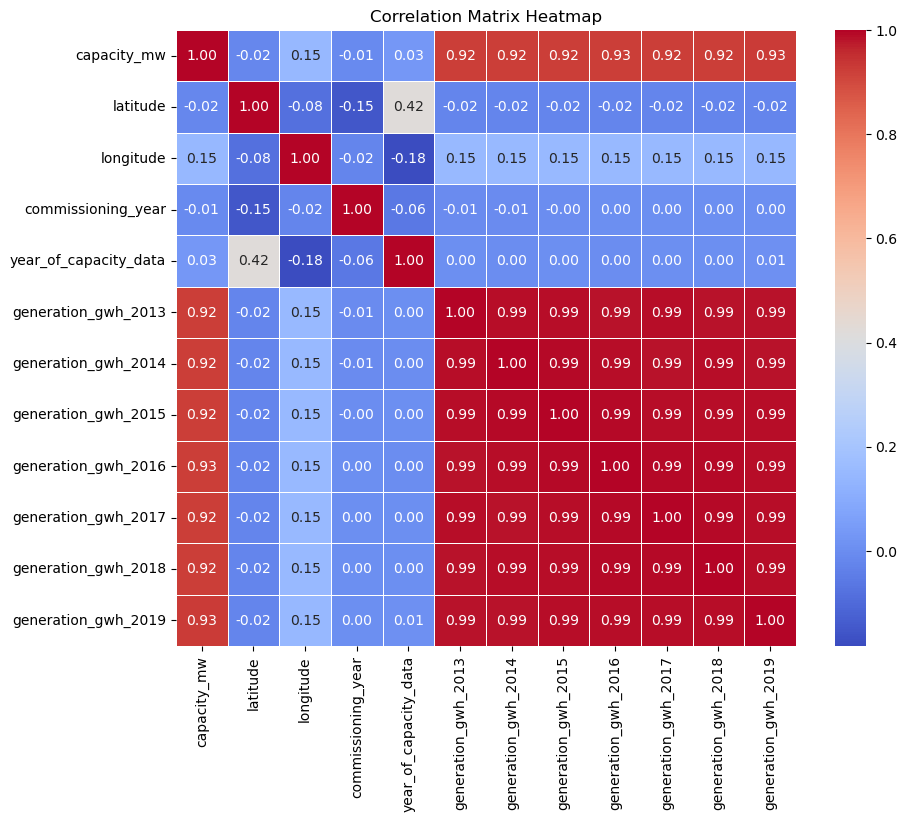

In [57]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Interpretation

There is a strong relationship between capacity_mw and generation_gwh_{year} which is expected because high capacity power plants will have higher yearly generation rate. There is also a strong rwaltionship between years for generation_gwh_{year}, but this is expected because generation rate is relatively constant as shown by the consistant standard deviation between years.

## Questions we are asking:

* How can the variables be visualized effectively (histograms, scatterplots, box plots, etc.)?
* Do the visualizations reveal any interesting patterns or insights?
* Are there any subgroups or clusters that can be identified visually?


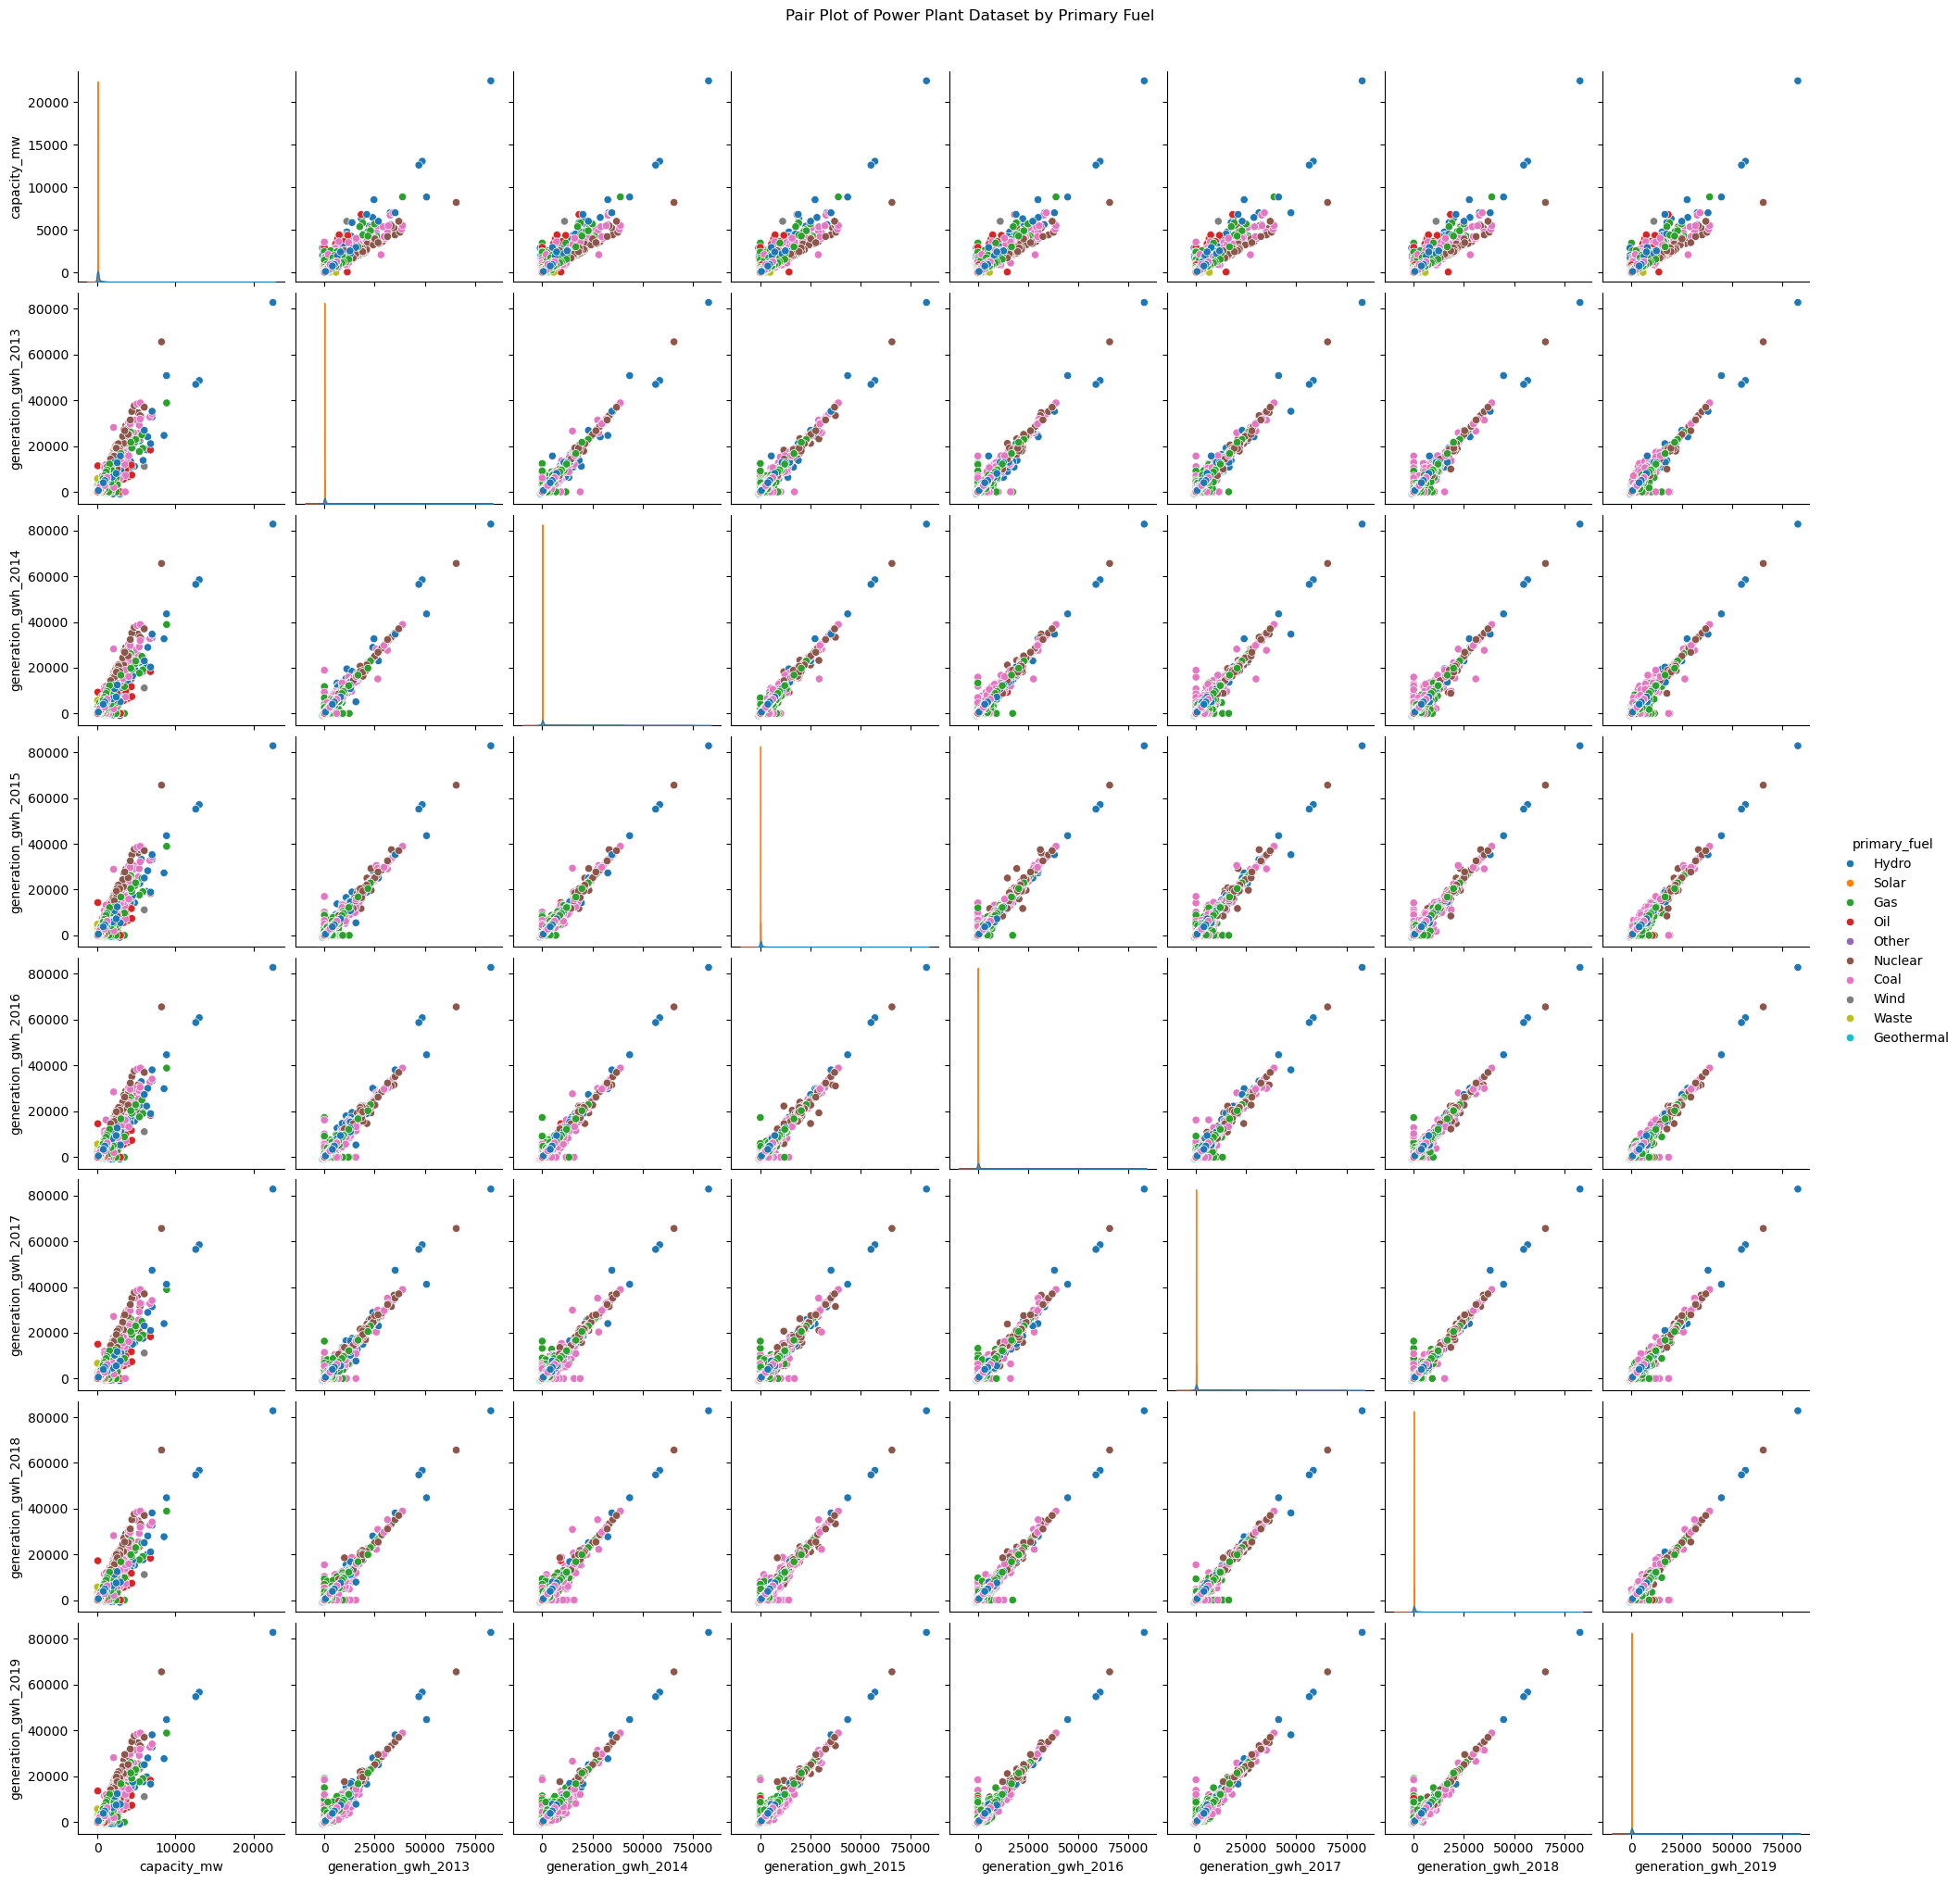

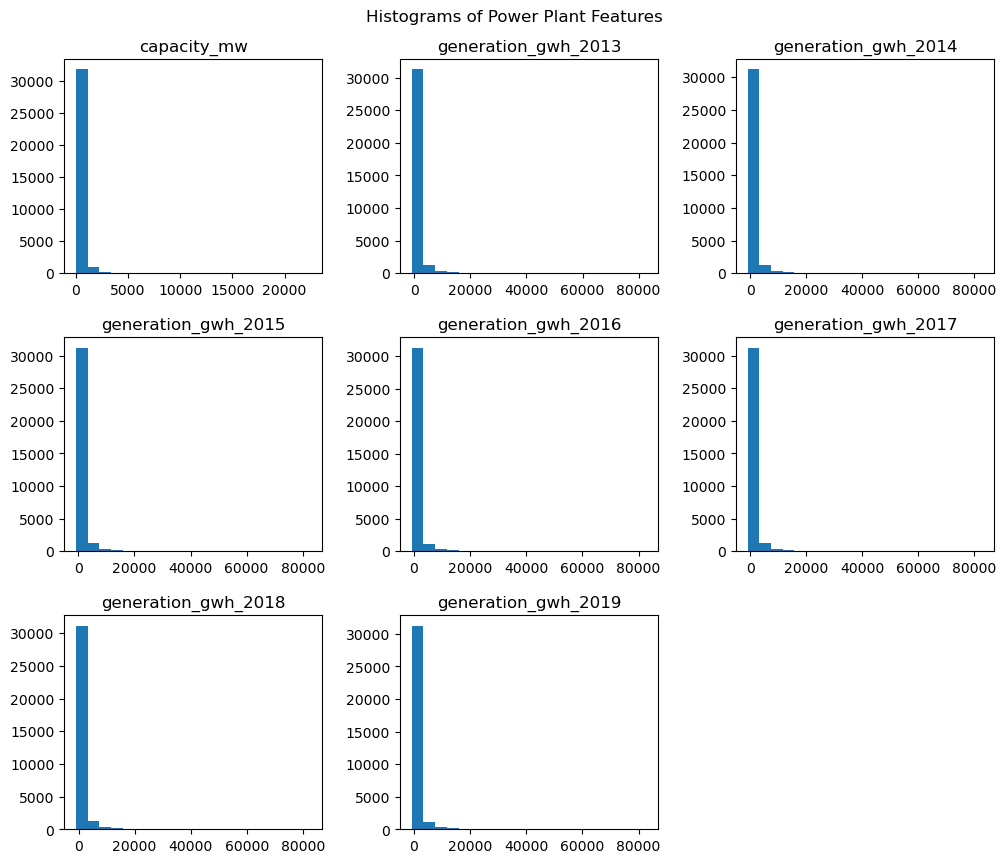

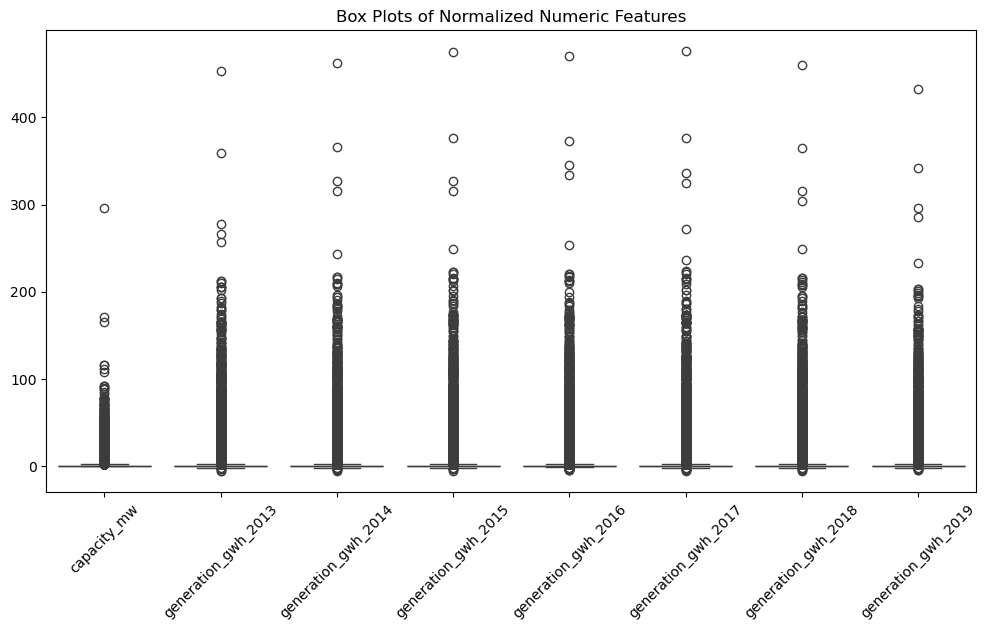

In [58]:
# Data Visualization
# Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ["latitude", "longitude", "commissioning_year", "year_of_capacity_data"]
numeric_columns = [col for col in numeric_columns if col not in exclude_cols]

# Pairplot of numeric features by primary_fuel
sns.pairplot(df[numeric_columns + ["primary_fuel"]], hue="primary_fuel", diag_kind="kde")
plt.suptitle("Pair Plot of Power Plant Dataset by Primary Fuel", y=1.02)
plt.show()

# Histograms
df[numeric_columns].hist(bins=20, figsize=(12, 10), grid=False)
plt.suptitle("Histograms of Power Plant Features", y=0.93)
plt.show()

"""
This transformation is being done because without normalization, the box plot provides useless visualization for all but one column.
The data is normalized using standard scalar. I
"""

scaled_df = pd.DataFrame(
    RobustScaler().fit_transform(df[numeric_columns]),
    columns=numeric_columns
)

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df[numeric_columns])
plt.title("Box Plots of Normalized Numeric Features")
plt.xticks(rotation=45)
plt.show()

## Interpretation

#### Pair Plot:
There are not clear collections of data for each power plant type. Data seems to be centered around a line that is easily given by an equation. Capacity_mw plots show a few points that do not follow the trend line, but this is epxected as some plants may run only during the day for example, so mwh will be higher to make up for downtime.The outliers are not a big concern as the vast majority if data is around a clear line. Since there are not clear clusters, primary fuel type does not have a large contrivution to capacity or generation (GWh)

#### Histograms:
Capacity and genration rate all show heavy left skew which is expected as the majority of power plants are very small. This is supported by the fact that the mean is muchh larger than the median.

#### Box Plots:
Box plots show for capacity and generation there are a large amount of outliers greated than the standard range. THis is relaistic and shows that small power plants greatly outnumber large power plants. These outliers should not be removed as they hold meaningful data aboiut larger power plants.

## Questions we are asking:

* Are there any new features that can be derived from the existing ones?
* Is there a need to transform or scale any variables?
* Are there any variables that can be combined or decomposed?


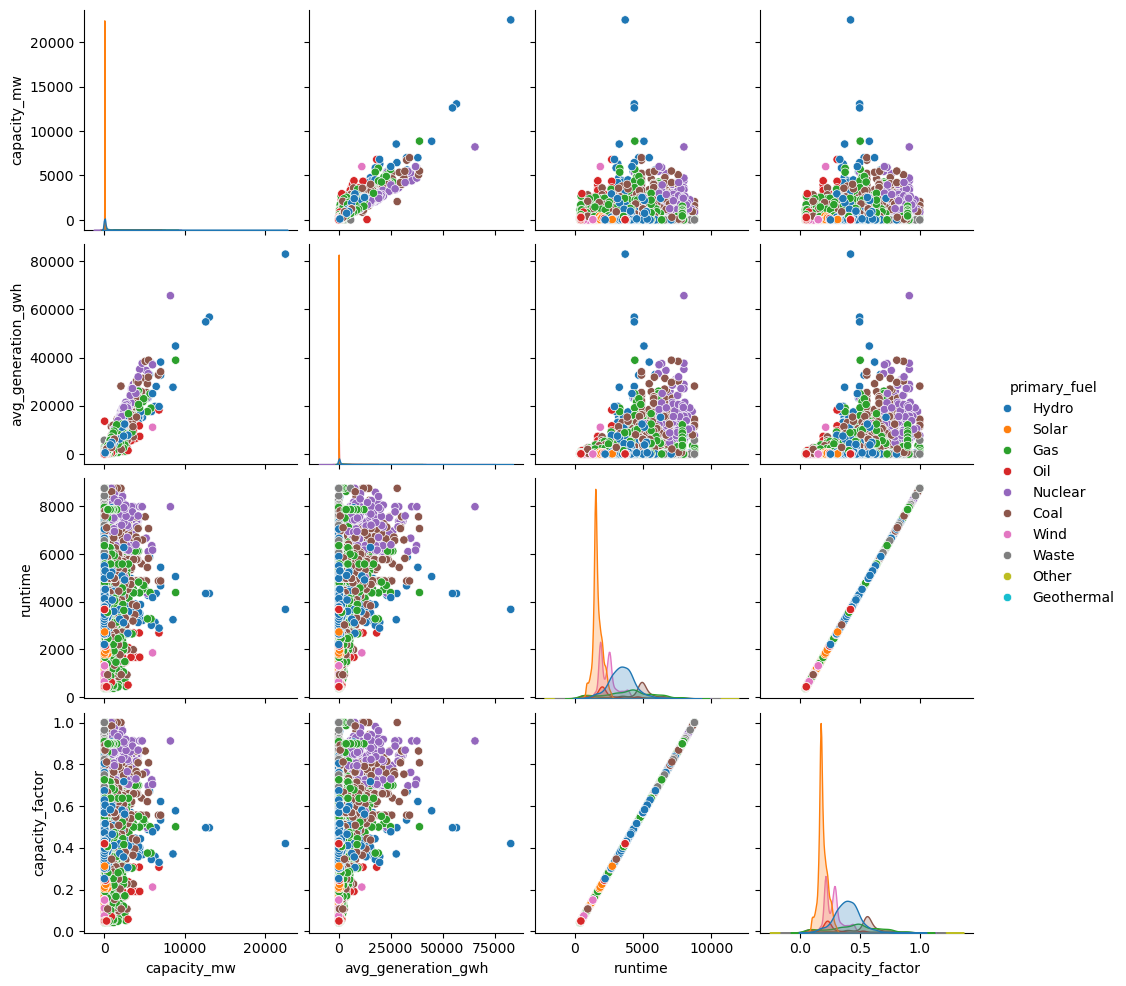

In [60]:
# Feature Engineering

# Compute avg_generation_gwh
df["avg_generation_gwh"] = df[[f"generation_gwh_{y}" for y in range(2013, 2020)]].mean(axis=1)

# Compute runtime hours
df["runtime"] = (df["avg_generation_gwh"] * 1000) / df["capacity_mw"]

# Cap runtime at the number of hours in a year because >8760 hours is not possible
df["runtime"] = df["runtime"].clip(upper=8760)

# Also compute capacity factor (0–1 scale, easier to interpret)
df["capacity_factor"] = df["runtime"] / 8760

# Filter out capacity factor > 0, because this is not possible, and therefore these data points are not valid
df = df[(df["capacity_factor"] >= 0) & (df["capacity_factor"] <= 1)]
df = df[df["runtime"] >= 365]

# Visualize with pairplot
sns.pairplot(
    df[["capacity_mw", "avg_generation_gwh", "runtime", "capacity_factor", "primary_fuel"]], hue="primary_fuel", diag_kind="kde"
)
plt.show()

## Interpretation

#### New Features:
New features runtime and capacity_factor were created. Runtime measures the average number of hours in year the plant is used. This can be used to filter out plants with very little run time which could cause bad data. Capacity_factor shows the ration of power generated vs power generated if ran 24/7. 

Solar has a low average capacity factor which makes sense because it can only be run in day light. Nuclear has a very high capcity factor since it can be run 24/7/365 in theory neglecting time for maintenance and refuel. 

Plants with capapcity factor < 0 or > 1 are thrown out because this is not possible.

Plants with runtime less than 365 hour / year are thrown out becasue this means they were not used enough to serve as a meaningful data point and errors are likely to skew the data point greatly.

The box plots show some separation of data by primary_fuel which makes sense because solar/wind energy is dependent of time of day while nuclear/hydro/gas/etc. can be run at any time throughout the day. Also the largest power plants are nuclear, gas, and coal which is logical from knowledge of our modern power grid.

# Data Quality Assessment

#### Profiling:
The global_power_plant_database.csv data contains columns: country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh_2013, estimated_generation_gwh_2014, estimated_generation_gwh_2015, estimated_generation_gwh_2016, estimated_generation_gwh_2017, estimated_generation_note_2013, estimated_generation_note_2014, estimated_generation_note_2015, estimated_generation_note_2016, estimated_generation_note_2017. There are 34936 rows of data. Estimations are made using the method here https://www.wri.org/publication/estimating-power-plant-generation-global-power-plant-database. The rest of the columns are inherent or measured values. 

#### Completeness:
Columns country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel are complete for all rows. Generation_gwh_{year} is missing >25000 values for each year. The estimation are valuable for filling many of these missing values. Generation rate is relaitvely constant by year, so missing values can be filled by the mean power geenration rate for that plant. Power generation is an issue of national security, so this is expected. This is not an issue of data collection methods or design. Other_fuel_1, other_fuel_2, and other_fuel_3 have >32000 missing values, but this is expected bacause many power plants only have one fuel source. Therefore, these can all be filled with the string "none". In the final data, there are no remaining missing values in generation_gwh_{year} which is very important as capacity, generation, and fuel type are most important for studying this data.

#### Accuracy:
Data is open source so there is a risk for bad data to be included. Countries also might over state their power generation to appear more advanced. Overall, the data did not contain many blantant outliers that would hint at largely falsified data. Also ~350000 rows of data is large enough that a few erroneous rows will have a negligible impact on the data when used in a machine learning model.

#### Consistency
The small number of outliers and values for each column closely huddled around the mean show that the sensors must have been consistent and provided meaningful and consisitent data. Inconsistent data collection would be shown in outliers and data that is not centered around a clear mean. Power generation is limited by physics, so data should and does show consistency around a definable line.

#### Integrity
This data is open source, but it should be treated as high integrity becuase power plants are monitored by high-tech equipment and consistently maintained for human safety and powergrid reliability. The large size of this dataset means that a few falsified or incorrrect values will have a very small overall affect due to the large amount of good data from reputable sources.

#### Distribution Measures
The data shows a very heavy right skew in generation and capacity. THis is because a small number of plants make much more power versus the average small plant. These large plants should not be neglected, so these are not true outliers and should be kept. There is a also a high kutosis for generation and capacity which shows heavy tails. This further supports the idea that a small number of huge power plants create much more power than the average small plant. This data is important and will be kept.

#### Lineage and Provenance
This data is well documented and collected from reliable government sources. It is recent as of 2019, so it is revelant now and for many more years to come.
